This file covers the second attempt at selecting/filtering Maven data based upon the quality column that is given by the CDA website. Even after filtering out any values with a quality score below 1, we are still seeing a lot of variation, and ultimately this data is not usable for our purposes. While the data is surely useful in measuring Mars' magnetosphere, it cannot be used as if it is not being affected by it.

In [9]:
import numpy as np
import pandas as pd
import datetime
posFrame = pd.read_csv('csv files/MavenPosition2.csv')
windFrame = pd.read_csv('csv files/MavenSolarWind2Quality.csv')
windFrame = windFrame.loc[:, ~windFrame.columns.str.contains('^Unnamed')]
posFrame = posFrame.loc[:, ~posFrame.columns.str.contains('^Unnamed')]
windFrame['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(windFrame['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'])
windFrame['date'] = pd.to_datetime(windFrame['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ']).dt.date
posFrame['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(posFrame['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'])
posFrame['date'] = pd.to_datetime(posFrame['EPOCH_yyyy-mm-ddThh:mm:ss.sssZ']).dt.date
mergedFrame = pd.merge(windFrame, posFrame, on='date')
mergedFrame = mergedFrame.drop(['date', 'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ'], axis=1)
mergedFrame = mergedFrame[mergedFrame.IonDensityN_CC != -1.0E+31]
mergedFrame = mergedFrame[mergedFrame.IonVelocityXKM_S != -1.0E+31]
mergedFrame = mergedFrame[mergedFrame.IonVelocityYKM_S != -1.0E+31]
mergedFrame = mergedFrame[mergedFrame.IonVelocityZKM_S != -1.0E+31]
mergedFrame = mergedFrame[mergedFrame.VelocityXQuality == 1]
mergedFrame['IonSpeedKM_S'] = np.linalg.norm(mergedFrame[['IonVelocityXKM_S','IonVelocityYKM_S','IonVelocityZKM_S']].values,axis=1)
mergedFrame = mergedFrame.resample('H', on = 'EPOCH__yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()

#mergedFrame.to_csv(r'csv files/MavenMerged2Quality.csv')
mergedFrame.head(30)

,EPOCH__yyyy-mm-ddThh:mm:ss.sssZ,IonDensityN_CC,IonVelocityXKM_S,IonVelocityYKM_S,IonVelocityZKM_S,VelocityXQuality,VelocityYQuality,VelocityZQuality,MarsGeoXKM,MarsGeoYKM,MarsGeoZKM,RAD_AU_AU,HGI_LAT_deg,HGI_LON_deg,IonSpeedKM_S
0,2015-01-01 00:00:00+00:00,9.706279,-389.680365,10.509217,-21.761872,1.0,1.0,1.0,4180.958904,-3079.611872,-7399.520548,1.38,5.6,272.8,390.519791
1,2015-01-01 01:00:00+00:00,10.859867,-383.875556,6.302253,-19.198578,1.0,1.0,1.0,2513.244444,841.838584,-8980.911111,1.38,5.6,272.8,384.460046
2,2015-01-01 02:00:00+00:00,20.155519,-319.956284,34.160082,-31.272571,1.0,1.0,1.0,1422.920765,4547.568306,-5069.371585,1.38,5.6,272.8,327.031715
3,2015-01-01 03:00:00+00:00,6.870385,-119.769231,-80.896154,-31.038462,1.0,1.0,1.0,-1836.538462,-3593.846154,2097.692308,1.38,5.6,272.8,148.100732
4,2015-01-01 04:00:00+00:00,5.085836,-394.764873,0.982852,-20.069193,1.0,1.0,1.0,-2000.509915,-5982.861190,-4751.274788,1.38,5.6,272.8,395.829942
5,2015-01-01 05:00:00+00:00,4.599533,-428.677778,22.498147,-44.662000,1.0,1.0,1.0,-183.223022,-3861.777778,-8686.622222,1.38,5.6,272.8,431.939826
6,2015-01-01 06:00:00+00:00,4.587783,-420.021226,98.958019,-78.087972,1.0,1.0,1.0,3262.099057,-763.645731,-7946.627358,1.38,5.6,272.8,446.559484
7,2015-01-01 07:00:00+00:00,3.306875,-334.881944,56.568403,-101.879861,1.0,1.0,1.0,5148.055556,746.888889,-4270.000000,1.38,5.6,272.8,357.018716
8,2015-01-01 08:00:00+00:00,6.514319,-391.558216,36.889239,-13.870808,1.0,1.0,1.0,-5457.981221,-68.741315,-864.173427,1.38,5.6,272.8,396.292183
9,2015-01-01 09:00:00+00:00,3.459000,-490.093333,53.242222,-43.325111,1.0,1.0,1.0,-5643.955556,-697.300000,-6550.600000,1.38,5.6,272.8,494.956431


<Figure size 432x288 with 0 Axes>

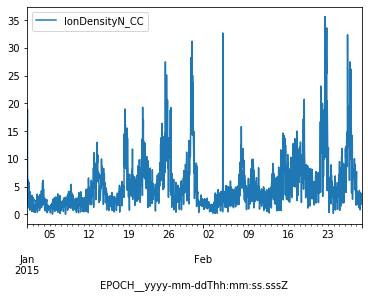

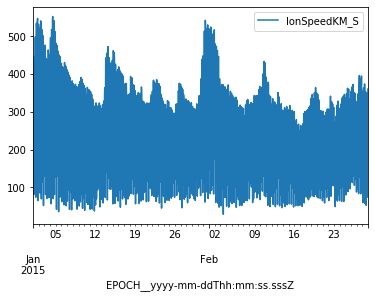

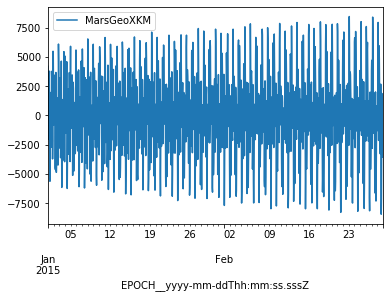

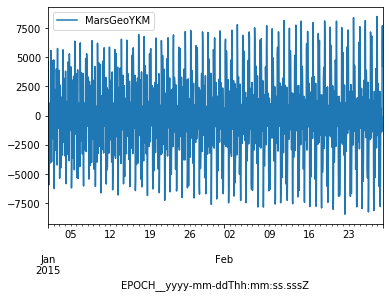

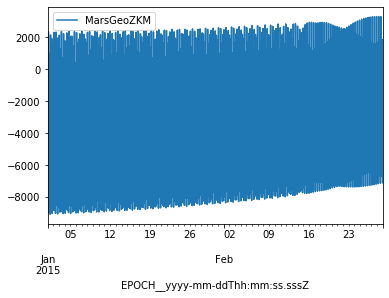

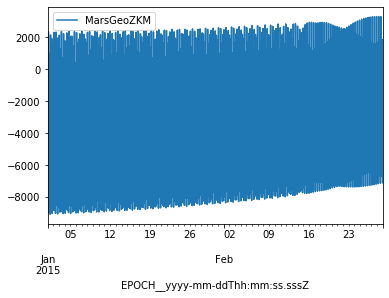

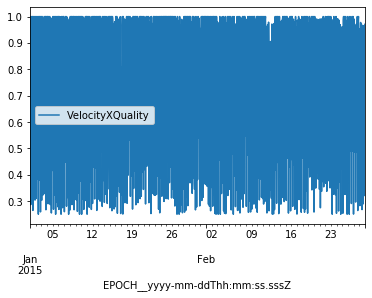

In [15]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Maven velocity and position data")

df = pd.read_csv('csv files/MavenMerged2Quality.csv')
df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

mergedFrame = mergedFrame[mergedFrame.VelocityXQuality == 1]
mergedFrame = mergedFrame[mergedFrame.VelocityYQuality == 1]
mergedFrame = mergedFrame[mergedFrame.VelocityZQuality == 1]

df['IonSpeedKM_S'] = np.linalg.norm(df[['IonVelocityXKM_S','IonVelocityYKM_S','IonVelocityZKM_S']].values,axis=1)

df = df.resample('H', on = 'EPOCH__yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()

df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='IonDensityN_CC')
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='IonSpeedKM_S')
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='MarsGeoXKM')
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='MarsGeoYKM')
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='MarsGeoZKM')
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='MarsGeoZKM')
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='VelocityXQuality')

plt.show()

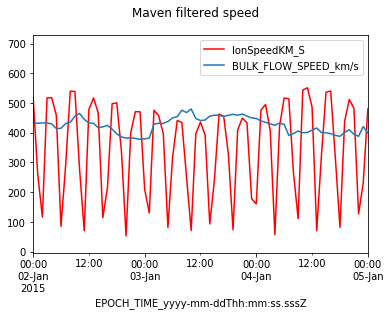

In [18]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle("Maven filtered speed")


df = pd.read_csv('csv files/MavenMerged2Quality.csv')
df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df['EPOCH__yyyy-mm-ddThh:mm:ss.sssZ'])




df['IonSpeedKM_S'] = np.linalg.norm(df[['IonVelocityXKM_S','IonVelocityYKM_S','IonVelocityZKM_S']].values,axis=1)

mergedFrame = mergedFrame[mergedFrame.VelocityXQuality == 1]
mergedFrame = mergedFrame[mergedFrame.VelocityYQuality == 1]
mergedFrame = mergedFrame[mergedFrame.VelocityZQuality == 1]

df = df.resample('H', on = 'EPOCH__yyyy-mm-ddThh:mm:ss.sssZ').mean().reset_index()

df1 = pd.read_csv('csv files/Omni4Maven2.csv')
df1['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'] = pd.to_datetime(df1['EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ'])

#df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='IonSpeedKM_S')

ax = plt.gca()
ay = plt.gca()
df.plot(kind='line', x='EPOCH__yyyy-mm-ddThh:mm:ss.sssZ', y='IonSpeedKM_S', color='red', ax=ax)
df1.plot(kind='line', x='EPOCH_TIME_yyyy-mm-ddThh:mm:ss.sssZ', y='BULK_FLOW_SPEED_km/s', ax=ax)

ax.set_xlim([datetime.date(2015, 1, 2), datetime.date(2015, 1, 5)])

plt.show()